<a href="https://colab.research.google.com/github/kairamilanifitria/Diebetes-Prediction-using-Deep-Learning/blob/main/Diabetes%20Prediction%20using%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset "diabetes.csv"
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/diabetes.csv")

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Penjelasan :

**Pregnancies**	: Jumlah berapa kali kehamilan yang dialami oleh orang tersebut

**Glucose** : Konsentrasi glukosa plasma dalam darah setelah 2 jam tes toleransi glukosa (mg/dL)

**BloodPressure** : Tekanan darah (mmHg)

**SkinThickness** : Ketebalan lipatan kulit trisep (mm)

**Insulin** : Kadar insulin serum setelah 2 jam tes toleransi glukosa (micro U/ml)

**BMI** : Body Mass Index dari berat/tinggi ((kg/m)^2)

**DiabetesPedigreeFunction** : Probabilitas diabetes berdasarkan riwayat diabetes dalam keluarga

**Age** : Umur (tahun)

**OUtcome** : variabel target yang menunjukkan apakah seseorang menderita diabetes atau tidak, (1=diabetes, 0=tidak diabetes)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.shape

(768, 9)

In [ ]:
# melihat data yang kosong
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


tidak ada data yang kosong

# 1. Data Cleaning

Tambahan:

Dari pengecekan dengan data describe, terdapat data yang perlu dikaji kembali. Contohnya blood pressure yang bernilai 0, skin thickness 0, dan kadar glukosa 0.Angka angka tersebut tidak normal, maka kita ubah dari nilai 0 menjadi NaN.

In [ ]:
data.replace({
    'BloodPressure': 0, 'SkinThickness': 0, 'Glucose': 0,
    'Insulin': 0, 'BMI': 0}, np.nan, inplace=True)

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.isnull().sum()/len(data)*100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


Kolom Insulin memiliki hampir 50% nilai NaN. Oleh karena itu, akan lebih baik untuk menghapus kolom tersebut sepenuhnya

In [ ]:
data.drop(columns=["Insulin"], inplace=True)

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'BMI']
for column in columns_to_replace:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [ ]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


data kosong sudah diisi dengan nilai median pada masing-masing attributes

# 2. Data Analytics

perlu dilihat hubungan antar attribute dengan target variable yang ditampilkan dalam bentuk visualisasi data

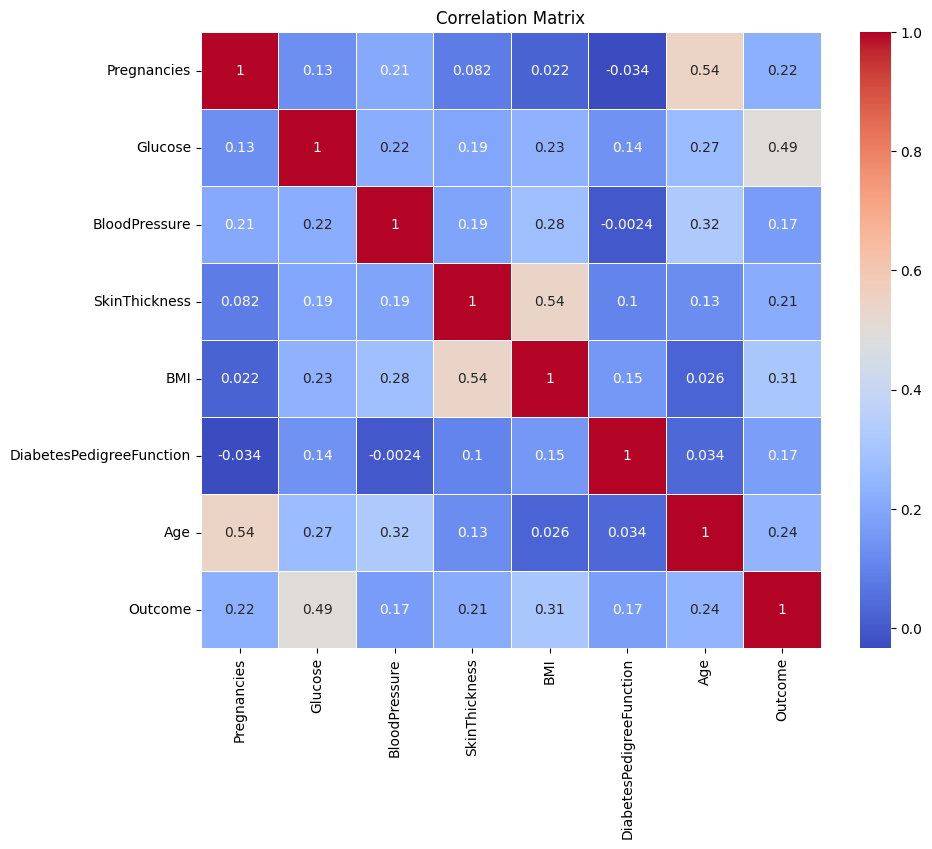

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

korelasi tertinggi ada pada nilai "Glucose" terhadap "Outcome:"

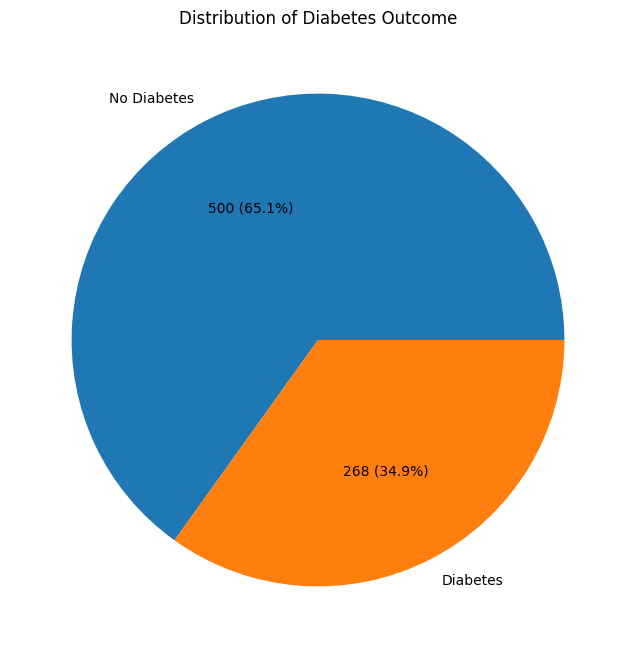

In [ ]:
plt.figure(figsize=(8, 8))
counts = data['Outcome'].value_counts()
plt.pie(counts, labels=['No Diabetes', 'Diabetes'], autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p))
plt.title('Distribution of Diabetes Outcome')
plt.show()


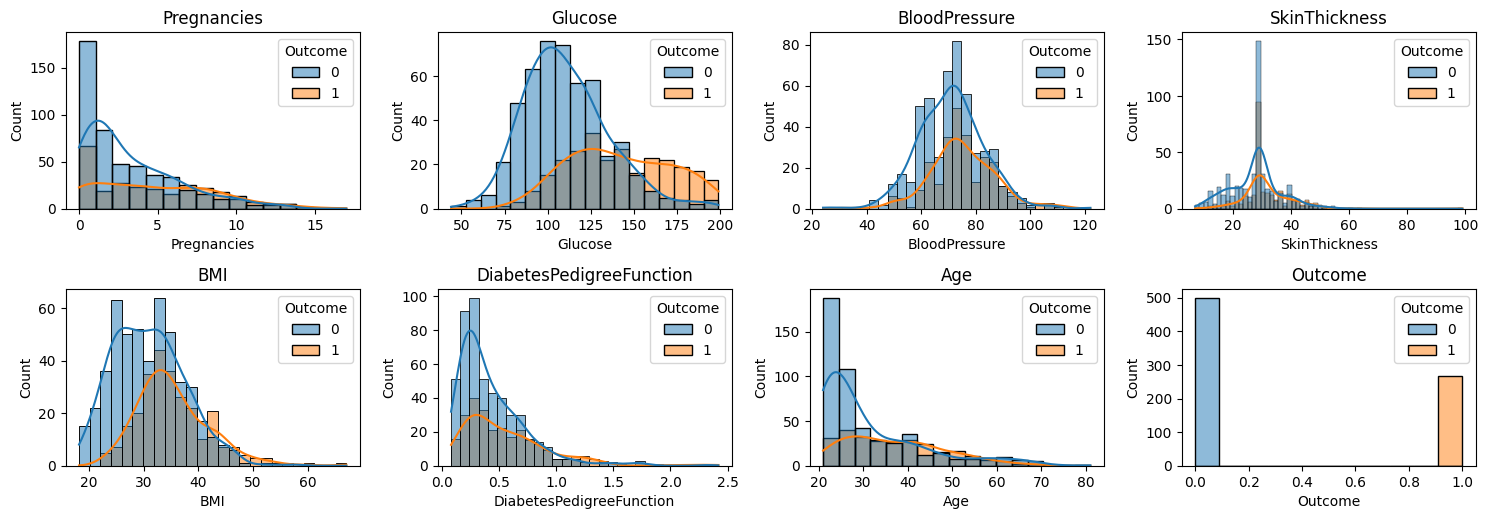

In [ ]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=data, x=column, hue='Outcome', kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


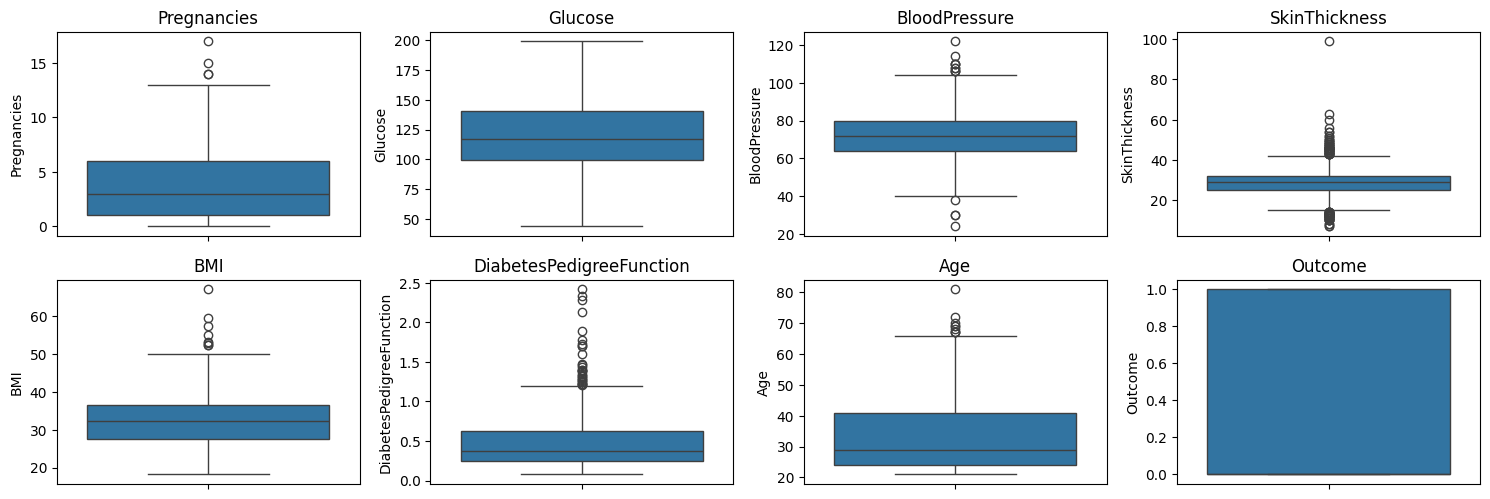

In [ ]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


beberapa attributes memiliki outlier, maka harus di handle terlebih dahulu

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [ ]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Before: {data.shape}, After: {data_out.shape}')

Before: (768, 8), After: (627, 8)


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


# 3. Data Modelling

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data into features (X) and target variable (y)
X = data_out.drop('Outcome', axis=1)
y = data_out['Outcome']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## Model 1

Layer : 2 hidden layer (12,8,1)

Activation : ReLU

Batch Size : 16

Epoch : 200

Optimizer : Adam

Loss : binary cross-entropy


In [ ]:
# Define the neural network model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_1.fit(X_train, y_train, epochs=200, batch_size=16)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.3421 - loss: 0.7974
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4108 - loss: 0.7186
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5958 - loss: 0.6842
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.6428
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7521 - loss: 0.6016
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8002 - loss: 0.5509
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7409 - loss: 0.5396
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7704 - loss: 0.5026
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7462 - loss: 0.5125
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7653 - loss: 0.4759
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7464 - loss: 0.4664
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accura

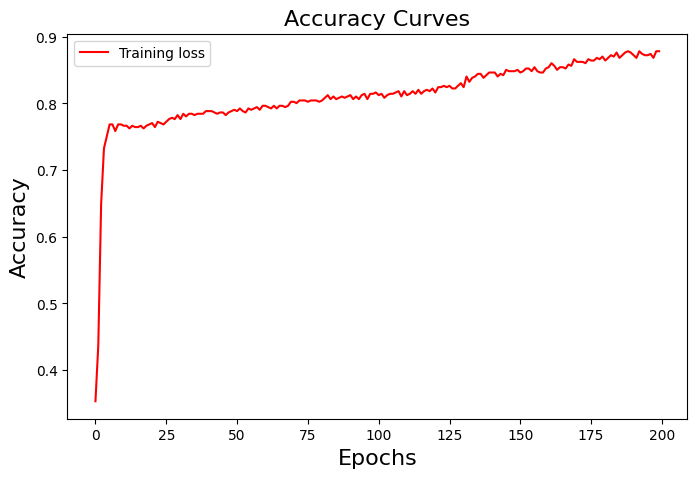

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model_1.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
# evaluate the keras model
_, accuracy = model_1.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 69.05




## Model_2

Layer : 2 hidden layer (12,8,1)

Activation : ReLU

Batch Size : 16

Epoch : 200

Optimizer : Adam

Loss : binary cross-entropy

**+ Early Stopping**


In [ ]:
# Define the neural network model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [ ]:
# Fit the model with early stopping
model_2.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5353 - loss: 0.6964 - val_accuracy: 0.6436 - val_loss: 0.6480
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6954 - loss: 0.6231 - val_accuracy: 0.7030 - val_loss: 0.6060
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7270 - loss: 0.6005 - val_accuracy: 0.7327 - val_loss: 0.5713
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7493 - loss: 0.5529 - val_accuracy: 0.7624 - val_loss: 0.5380
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7672 - loss: 0.5322 - val_accuracy: 0.7723 - val_loss: 0.5159
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7811 - loss: 0.5002 - val_accuracy: 0.7723 - val_loss: 0.4957
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.4976 - val_accuracy: 0.7723 - val_loss: 0.4818
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7639 - loss: 0.4772 - val_accuracy: 0.7723 - 

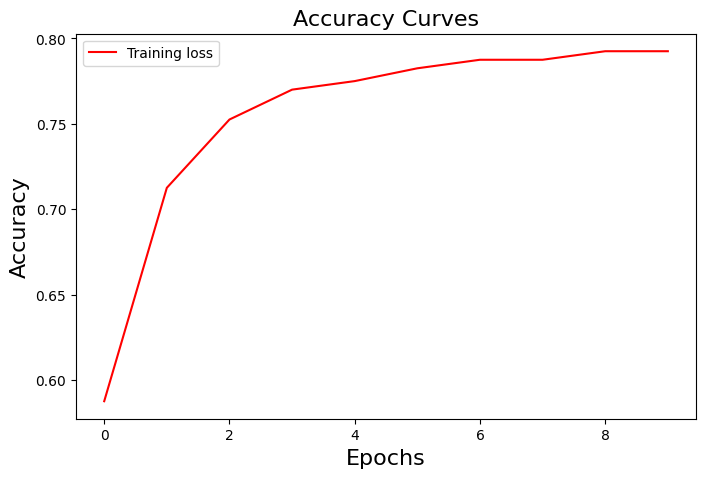

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model_2.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
# evaluate the keras model
_, accuracy = model_2.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 73.02


## Hyperparameter Tuning

hyperparameter tuning + bayesian optimization

test all of the possible parameter

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
from kerastuner import HyperParameters
from kerastuner.tuners import BayesianOptimization
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
def build_model(hp):
    model = Sequential()

    # First layer
    model.add(Dense(units=hp.Int('units_1', min_value=8, max_value=64),
                    activation=hp.Choice('activation_1', values=['relu', 'tanh', 'sigmoid']),
                    input_shape=(X_train.shape[1],)))

    # Additional hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i+2}', min_value=8, max_value=64),
                        activation=hp.Choice(f'activation_{i+2}', values=['relu'])))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    else:
        opt = SGD()

    # Compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',  # Objective to optimize (could be val_loss or others)
    max_trials=10,             # Number of different models to try
    executions_per_trial=1,    # Number of times to train each model
    directory='my_dir',        # Directory to store results
    project_name='diabetes_tuning4'  # Name of the project
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
tuner.search(X_train, y_train,
             epochs=200,
             validation_split=0.2,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])


Trial 20 Complete [00h 00m 09s]
val_accuracy: 0.7722772359848022

Best val_accuracy So Far: 0.801980197429657
Total elapsed time: 00h 05m 24s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Evaluate the best model on the test set
test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 59)                  │             472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 20)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 27)                  │             567 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 53)                  │           1,484 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              54 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7642 - loss: 0.5043  
Test Accuracy: 0.77


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units for the first dense layer: {best_hps.get('units_1')}")
print(f"Best activation function 1st layer: {best_hps.get('activation_1')}")
print(f"Best optimizer: {best_hps.get('optimizer')}")


Best units for the first dense layer: 59
Best activation function 1st layer: relu
Best optimizer: rmsprop


## 3. Model 3 (based on result of hyperparameter tuning)

Best val_accuracy So Far: 0.8118811845779419 & Test Accuracy: 0.76



Best units for the first dense layer: 64

Best activation function: relu

Best optimizer: rmsprop

Best learning rate: 0.01

In [ ]:
# build model based on hyperparameter tuning as model 3
# Define the neural network model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# Fit the model with early stopping
model_3.fit(X_train, y_train, epochs=200, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4904 - loss: 0.7016 - val_accuracy: 0.7525 - val_loss: 0.5995
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8050 - loss: 0.5616 - val_accuracy: 0.7525 - val_loss: 0.5216
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7400 - loss: 0.5238 - val_accuracy: 0.7525 - val_loss: 0.4773
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.4798 - val_accuracy: 0.7525 - val_loss: 0.4585
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7338 - loss: 0.4673 - val_accuracy: 0.7327 - val_loss: 0.4456
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.4672 - val_accuracy: 0.7525 - val_loss: 0.4416
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8197 - loss: 0.3743 - val_accuracy: 0.7426 - val_loss: 0.4367
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8067 - loss: 0.3876 - val_accuracy: 0.7426 - 

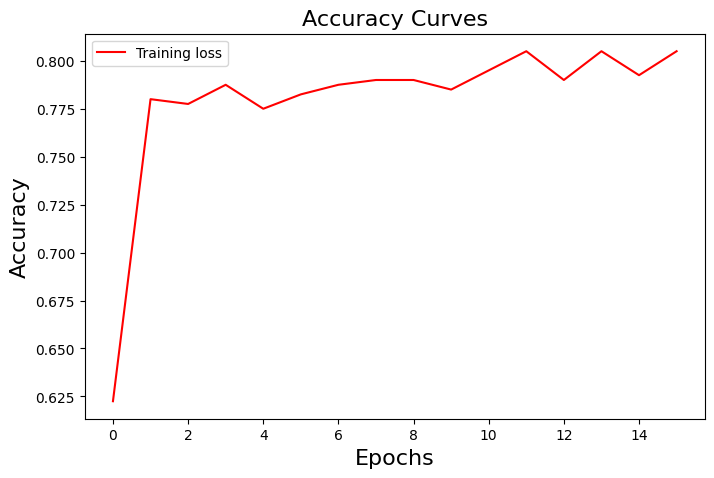

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(model_3.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [ ]:
# evaluate the keras model
_, accuracy = model_3.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 77.78


# 4. Data Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


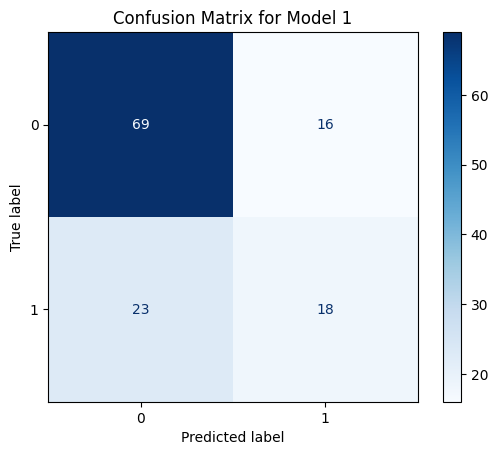

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model 1
y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")
cm_1 = confusion_matrix(y_test, y_pred_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 1')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


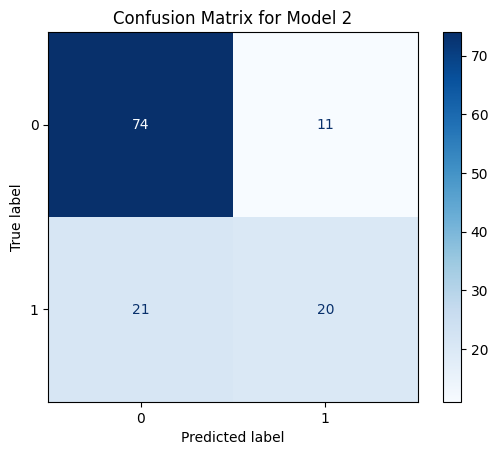

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model 2 that use early stopping
y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")
cm_2 = confusion_matrix(y_test, y_pred_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 2')
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


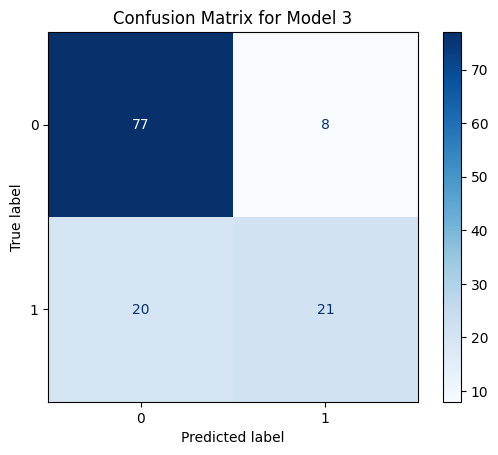

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model 3 based on hyperparameter tuning
y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")
cm_3 = confusion_matrix(y_test, y_pred_3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_3)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 3')
plt.show()

In [ ]:


from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Model 1
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)

print("Model 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"F1-score: {f1_1:.2f}")

# Calculate precision, recall, and F1-score for Model 2
precision_2 = precision_score(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2)

print("\nModel 2:")
print(f"Precision: {precision_2:.2f}")
print(f"Recall: {recall_2:.2f}")
print(f"F1-score: {f1_2:.2f}")

# Calculate precision, recall, and F1-score for Model 3
precision_3 = precision_score(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)
f1_3 = f1_score(y_test, y_pred_3)

print("\nModel 3:")
print(f"Precision: {precision_3:.2f}")
print(f"Recall: {recall_3:.2f}")
print(f"F1-score: {f1_3:.2f}")


Model 1:
Precision: 0.53
Recall: 0.44
F1-score: 0.48

Model 2:
Precision: 0.65
Recall: 0.49
F1-score: 0.56

Model 3:
Precision: 0.72
Recall: 0.51
F1-score: 0.60


In [ ]:
model_3.save('model_3.h5')